In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('/kaggle/input/gammafest-water-feasability/no_map_imputed_mf5iter.csv')
df_train

,DC216,DC220,DC142a,DC024,DC025,DC205,DC206,DC207,DC208,DC209,...,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC201
0,1.0,80.0,60.0,11,2,16.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,1
1,2.0,44.0,70.0,11,2,31.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,1
2,2.0,35.0,75.0,11,2,12.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,1
3,3.0,79.0,85.0,11,2,12.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1,11.0,1
4,2.0,37.0,65.0,11,2,12.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35965,1.0,21.0,9.0,94,1,17.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1,21.0,1
35966,1.0,41.0,12.0,94,1,12.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,1
35967,2.0,52.0,48.0,94,1,12.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1,11.0,1
35968,2.0,58.0,39.0,94,1,12.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,1


In [3]:
target = 'DC201'
NUMERICAL_DATA = ['DC216', 'DC220', 'DC142a']
CATEGORICAL_DATA = [column for column in df_train.columns if column != target and column not in NUMERICAL_DATA]

COLUMN_CATEGORICAL_INDEX = []

for column in CATEGORICAL_DATA:
    COLUMN_CATEGORICAL_INDEX.append(df_train.columns.get_loc(column))

In [4]:
df_test = pd.read_csv('/kaggle/input/gammafest-water-feasability/test.csv')
df_test_ids = df_test.pop('id')
df_test

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a
0,35,2,17,1,0,1,0,1,1,0,...,0,0,1,1,1,1,1,3,21,52
1,35,1,12,1,1,1,1,0,1,0,...,0,0,1,1,0,0,1,2,11,18
2,74,2,12,1,0,1,1,1,1,0,...,0,0,1,0,0,1,4,5,11,78
3,72,1,12,1,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,11,20
4,76,2,12,1,0,1,0,0,1,0,...,0,0,1,1,1,1,1,3,11,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,65,2,12,1,0,1,0,0,1,1,...,0,0,1,0,0,0,0,4,11,70
11986,61,2,12,1,0,1,1,0,1,0,...,0,1,1,1,1,0,0,4,11,120
11987,74,1,12,1,1,1,1,0,1,0,...,0,0,1,1,0,0,1,2,11,72
11988,74,2,31,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,1,51,9


In [5]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
scaler = StandardScaler()

# train set
numerical_df_train = df_train[NUMERICAL_DATA].astype(float).copy()
categorical_df_train = df_train[CATEGORICAL_DATA].astype('category').copy()

# normalization
scaler.fit(numerical_df_train)
numerical_df_train = scaler.transform(numerical_df_train)
numerical_df_train = pd.DataFrame(numerical_df_train, columns=NUMERICAL_DATA)


# test set
numerical_df_test = df_test[NUMERICAL_DATA].astype(float).copy()
categorical_df_test = df_test[CATEGORICAL_DATA].astype('category').copy()

# normalization
numerical_df_test = scaler.transform(numerical_df_test)
numerical_df_test = pd.DataFrame(numerical_df_test, columns=NUMERICAL_DATA)

# Create an instance of the OneHotEncoder
encoder = ce.OneHotEncoder(cols=CATEGORICAL_DATA, use_cat_names=True)

# Fit the encoder on the training data
encoder.fit(categorical_df_train)

one_hot_df_train = encoder.transform(categorical_df_train)
one_hot_df_test = encoder.transform(categorical_df_test)

merged_df_train = pd.concat([numerical_df_train, one_hot_df_train, df_train[target]], axis=1)
merged_df_test = pd.concat([numerical_df_test, one_hot_df_test], axis=1)

# merged_df_train

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
merged_df_train

,DC216,DC220,DC142a,DC024_11.0,DC024_12.0,DC024_13.0,DC024_14.0,DC024_15.0,DC024_16.0,DC024_17.0,...,DC109_12.0,DC109_31.0,DC109_11.0,DC109_41.0,DC109_32.0,DC109_21.0,DC109_51.0,DC109_33.0,DC109_96.0,DC201
0,-1.197714,2.298908,-0.248722,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,-0.292958,-0.326370,-0.139020,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,-0.292958,-0.982689,-0.084169,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.611798,2.225983,0.025533,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,-0.292958,-0.836840,-0.193871,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35965,-1.197714,-2.003630,-0.808201,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
35966,-1.197714,-0.545143,-0.775291,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
35967,-0.292958,0.257025,-0.380364,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
35968,-0.292958,0.694572,-0.479096,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [7]:
merged_df_test

,DC216,DC220,DC142a,DC024_11.0,DC024_12.0,DC024_13.0,DC024_14.0,DC024_15.0,DC024_16.0,DC024_17.0,...,DC270a_3.0,DC109_12.0,DC109_31.0,DC109_11.0,DC109_41.0,DC109_32.0,DC109_21.0,DC109_51.0,DC109_33.0,DC109_96.0
0,-1.197714,-1.420235,-0.336483,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,-1.197714,-0.472218,-0.709470,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.292958,-0.180521,-0.051258,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-1.197714,-0.180521,-0.687529,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.611798,-0.107596,0.464341,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,-0.292958,-0.909764,-0.139020,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11986,-0.292958,-0.399294,0.409490,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11987,-0.292958,-0.253445,-0.117079,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11988,-1.197714,-2.076554,-0.808201,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
a = np.sort(one_hot_df_train.columns)
b = np.sort(one_hot_df_test.columns)
diff = np.setdiff1d(b,a)
diff

array([], dtype=object)

In [9]:
# for column in a:
#     print(column)
#     a = one_hot_df_train[column].unique()
#     b = one_hot_df_test[column].unique()
#     print(a, '|', b)
#     non_unique = np.setdiff1d(b,a)
#     print(non_unique)
#     print('---')

In [10]:
trainds = merged_df_train.copy()
testds = merged_df_test.copy()

y = trainds.pop(target)
X = trainds

X_test = testds

In [11]:
from sklearn.model_selection import train_test_split

train_size = 0.8
RANDOM_SEED = 69

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = train_size,
                                                  random_state = RANDOM_SEED)

# We will keep the shuffle = True since our dataset has not any time dependency.

In [12]:
RANDOM_SEED = 42


In [19]:
import lightgbm as lgbm

lgbm = lgbm.LGBMClassifier(device="gpu", random_state=RANDOM_SEED)

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(tree_method='gpu_hist', gpu_id=0,
                    # objective='binary:logistic', 
#                     early_stopping_rounds=10, 
                    # verbose_eval=True, 
                    random_state = RANDOM_SEED
                    )

In [21]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(task_type='GPU', devices='0:1', random_seed=RANDOM_SEED)

In [22]:
from datetime import datetime

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

folds = 5
param_comb = 10

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = RANDOM_SEED)

In [24]:
# A parameter grid for XGBoost
params = {
#         'min_child_weight': [5, 7, 9],
#         'gamma': [0.1, 0.0005, 0.001],
#         'subsample': [0.6, 0.8, 1],
#         'colsample_bytree': [1.0],
#         'max_depth': [12],
#         'learning_rate': [0.1, 0.2],
#         'reg_alpha': [0.1],
#         'reg_lambda': [1],
#         'eval_metric': ['error'],
#         'n_estimators': [100, 500, 1000]
        }

"""
{'colsample_bytree': 1.0, 'eval_metric': 'error', 'gamma': 0.0005, 
'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 7, 'n_estimators': 100, 
'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}
"""

grid_xgb = GridSearchCV(estimator=xgb, param_grid=params,
                    scoring='f1_micro', n_jobs=-1,
                    cv=skf, verbose=3)

grid_lgbm = GridSearchCV(estimator=lgbm, param_grid=params,
                    scoring='f1_micro', n_jobs=-1,
                    cv=skf, verbose=3)

grid_catboost = GridSearchCV(estimator=catboost, param_grid=params,
                    scoring='f1_micro', n_jobs=-1,
                    cv=skf, verbose=3)

start_time = timer(None) # timing starts from this point for "start_time" variable
# grid.fit(X_train_fit, y_train_fit)
grid_xgb.fit(X_train, y_train)
grid_lgbm.fit(X_train, y_train)
grid_catboost.fit(X_train, y_train)
# grid.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5] END ..................................., score=0.916 total time=   2.6s
[CV 4/5] END ..................................., score=0.915 total time=   1.5s
[CV 1/5] END ....................................., score=nan total time=   0.3s
[CV 3/5] END ....................................., score=nan total time=   0.3s
[CV 5/5] END ....................................., score=nan total time=   0.2s
[CV 2/5] END ..................................., score=0.916 total time=   1.4s
[CV 4/5] END ..................................., score=0.915 total time=   1.3s
[CV 1/5] END ..................................., score=0.909 total time=  11.4s


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/5] END ..................................., score=0.909 total time=   2.7s
[CV 3/5] END ..................................., score=0.912 total time=   1.3s
[CV 5/5] END ..................................., score=0.916 total time=   1.0s
[CV 2/5] END ....................................., score=nan total time=   0.3s
[CV 4/5] END ....................................., score=nan total time=   0.2s
[CV 1/5] END ..................................., score=0.909 total time=   1.3s
[CV 3/5] END ..................................., score=0.912 total time=   1.3s
[CV 5/5] END ..................................., score=0.916 total time=   0.9s
[CV 2/5] END ..................................., score=0.919 total time=  11.4s


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[CV 4/5] END ..................................., score=0.913 total time=   1.4s
Learning rate set to 0.02837
0:	learn: 0.6527241	total: 66.1ms	remaining: 1m 6s
1:	learn: 0.6234418	total: 112ms	remaining: 55.7s
2:	learn: 0.5919992	total: 150ms	remaining: 49.9s
3:	learn: 0.5672905	total: 207ms	remaining: 51.5s
4:	learn: 0.5405271	total: 254ms	remaining: 50.5s
5:	learn: 0.5163288	total: 301ms	remaining: 49.9s
6:	learn: 0.4971134	total: 344ms	remaining: 48.8s
7:	learn: 0.4754745	total: 388ms	remaining: 48.2s
8:	learn: 0.4606084	total: 436ms	remaining: 48s
9:	learn: 0.4452304	total: 483ms	remaining: 47.8s
10:	learn: 0.4282889	total: 530ms	remaining: 47.7s
11:	learn: 0.4151024	total: 572ms	remaining: 47.1s
12:	learn: 0.4045343	total: 604ms	remaining: 45.8s
13:	learn: 0.3948978	total: 630ms	remaining: 44.4s
14:	learn: 0.3855358	total: 677ms	remaining: 44.4s
15:	learn: 0.3734224	total: 724ms	remaining: 44.6s
16:	learn: 0.3650195	total: 767ms	remaining: 44.4s
17:	learn: 0.3542175	total: 813ms	

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


778:	learn: 0.1883798	total: 1m 27s	remaining: 24.7s
779:	learn: 0.1882987	total: 1m 27s	remaining: 24.6s
780:	learn: 0.1882484	total: 1m 27s	remaining: 24.5s
781:	learn: 0.1882214	total: 1m 27s	remaining: 24.3s
782:	learn: 0.1882045	total: 1m 27s	remaining: 24.2s
783:	learn: 0.1881411	total: 1m 27s	remaining: 24.1s
784:	learn: 0.1881090	total: 1m 27s	remaining: 24s
785:	learn: 0.1881089	total: 1m 27s	remaining: 23.9s
786:	learn: 0.1880696	total: 1m 27s	remaining: 23.8s
787:	learn: 0.1880273	total: 1m 27s	remaining: 23.6s
788:	learn: 0.1879895	total: 1m 27s	remaining: 23.5s
789:	learn: 0.1879316	total: 1m 28s	remaining: 23.4s
790:	learn: 0.1879293	total: 1m 28s	remaining: 23.3s
791:	learn: 0.1878818	total: 1m 28s	remaining: 23.2s
792:	learn: 0.1878320	total: 1m 28s	remaining: 23s
793:	learn: 0.1878078	total: 1m 28s	remaining: 22.9s
794:	learn: 0.1877683	total: 1m 28s	remaining: 22.8s
795:	learn: 0.1877372	total: 1m 28s	remaining: 22.7s
796:	learn: 0.1876831	total: 1m 28s	remaining: 22.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


933:	learn: 0.1838005	total: 1m 44s	remaining: 7.36s
934:	learn: 0.1837803	total: 1m 44s	remaining: 7.24s
935:	learn: 0.1837698	total: 1m 44s	remaining: 7.13s
936:	learn: 0.1837098	total: 1m 44s	remaining: 7.01s
937:	learn: 0.1837047	total: 1m 44s	remaining: 6.9s
938:	learn: 0.1836801	total: 1m 44s	remaining: 6.79s
939:	learn: 0.1836507	total: 1m 44s	remaining: 6.67s
940:	learn: 0.1835886	total: 1m 44s	remaining: 6.56s
941:	learn: 0.1835357	total: 1m 44s	remaining: 6.45s
942:	learn: 0.1834906	total: 1m 44s	remaining: 6.33s
943:	learn: 0.1834429	total: 1m 44s	remaining: 6.22s
944:	learn: 0.1834189	total: 1m 44s	remaining: 6.1s
945:	learn: 0.1833760	total: 1m 44s	remaining: 5.99s
946:	learn: 0.1833287	total: 1m 44s	remaining: 5.87s
947:	learn: 0.1833257	total: 1m 45s	remaining: 5.76s
948:	learn: 0.1833255	total: 1m 45s	remaining: 5.64s
949:	learn: 0.1832846	total: 1m 45s	remaining: 5.53s
950:	learn: 0.1832312	total: 1m 45s	remaining: 5.42s
951:	learn: 0.1832028	total: 1m 45s	remaining: 5

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Learning rate set to 0.02837
0:	learn: 0.6524239	total: 99.6ms	remaining: 1m 39s
1:	learn: 0.6200813	total: 192ms	remaining: 1m 35s
2:	learn: 0.5896552	total: 280ms	remaining: 1m 33s
3:	learn: 0.5650693	total: 375ms	remaining: 1m 33s
4:	learn: 0.5427081	total: 459ms	remaining: 1m 31s
5:	learn: 0.5190566	total: 565ms	remaining: 1m 33s
6:	learn: 0.4967264	total: 680ms	remaining: 1m 36s
7:	learn: 0.4762676	total: 753ms	remaining: 1m 33s
8:	learn: 0.4607671	total: 827ms	remaining: 1m 31s
9:	learn: 0.4459533	total: 902ms	remaining: 1m 29s
10:	learn: 0.4288536	total: 977ms	remaining: 1m 27s
11:	learn: 0.4160765	total: 1.06s	remaining: 1m 27s
12:	learn: 0.4055403	total: 1.11s	remaining: 1m 24s
13:	learn: 0.3959173	total: 1.19s	remaining: 1m 24s
14:	learn: 0.3841715	total: 1.27s	remaining: 1m 23s
15:	learn: 0.3736869	total: 1.33s	remaining: 1m 21s
16:	learn: 0.3657271	total: 1.4s	remaining: 1m 21s
17:	learn: 0.3546113	total: 1.48s	remaining: 1m 20s
18:	learn: 0.3494989	total: 1.57s	remaining: 

In [25]:
print('\n All results:')
print(grid_xgb.cv_results_)
print(grid_lgbm.cv_results_)
print(grid_catboost.cv_results_)
# print('\n Best estimator:')
# print(grid_xgb.best_estimator_)
# print(grid_lgbm.best_estimator_)
# print(grid_catboost.best_estimator_)
print('\n Best score:')
print(grid_xgb.best_score_ * 2 - 1)
print(grid_lgbm.best_score_ * 2 - 1)
print(grid_catboost.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid_xgb.best_params_)
print(grid_lgbm.best_params_)
print(grid_catboost.best_params_)


 All results:
{'mean_fit_time': array([1.17484298]), 'std_fit_time': array([0.17678794]), 'mean_score_time': array([0.06548257]), 'std_score_time': array([0.01151162]), 'params': [{}], 'split0_test_score': array([0.90948575]), 'split1_test_score': array([0.91607298]), 'split2_test_score': array([0.91172893]), 'split3_test_score': array([0.91468288]), 'split4_test_score': array([0.91589922]), 'mean_test_score': array([0.91357395]), 'std_test_score': array([0.00256902]), 'rank_test_score': array([1], dtype=int32)}
{'mean_fit_time': array([5.2530889]), 'std_fit_time': array([4.96795668]), 'mean_score_time': array([0.07425437]), 'std_score_time': array([0.01951714]), 'params': [{}], 'split0_test_score': array([0.90896456]), 'split1_test_score': array([0.91850565]), 'split2_test_score': array([0.91294526]), 'split3_test_score': array([0.91329279]), 'split4_test_score': array([0.9164205]), 'mean_test_score': array([0.91402575]), 'std_test_score': array([0.00325959]), 'rank_test_score': arra

In [26]:
from sklearn.metrics import classification_report, f1_score

# predictions = xgb.predict(X_val)
# predictions = random_search.predict(X_val)
predictions_xgb = grid_xgb.best_estimator_.predict(X_val)
predictions_lgbm = grid_lgbm.best_estimator_.predict(X_val)
prediction_catboost = grid_catboost.best_estimator_.predict(X_val)
print('xgb')
print(classification_report(y_val,predictions_xgb, digits=4))
print('lgbm')
print(classification_report(y_val,predictions_lgbm, digits=4))
print('catboost')
print(classification_report(y_val,prediction_catboost, digits=4))
print(f1_score(y_val, predictions_xgb))
print(f1_score(y_val, predictions_lgbm))
print(f1_score(y_val, prediction_catboost))

xgb
              precision    recall  f1-score   support

           0     0.6202    0.3404    0.4396       705
           1     0.9317    0.9773    0.9540      6489

    accuracy                         0.9149      7194
   macro avg     0.7759    0.6589    0.6968      7194
weighted avg     0.9012    0.9149    0.9036      7194

lgbm
              precision    recall  f1-score   support

           0     0.6535    0.3050    0.4159       705
           1     0.9286    0.9824    0.9548      6489

    accuracy                         0.9160      7194
   macro avg     0.7911    0.6437    0.6853      7194
weighted avg     0.9017    0.9160    0.9020      7194

catboost
              precision    recall  f1-score   support

           0     0.6484    0.2851    0.3961       705
           1     0.9268    0.9832    0.9542      6489

    accuracy                         0.9148      7194
   macro avg     0.7876    0.6342    0.6751      7194
weighted avg     0.8995    0.9148    0.8995      7194

0

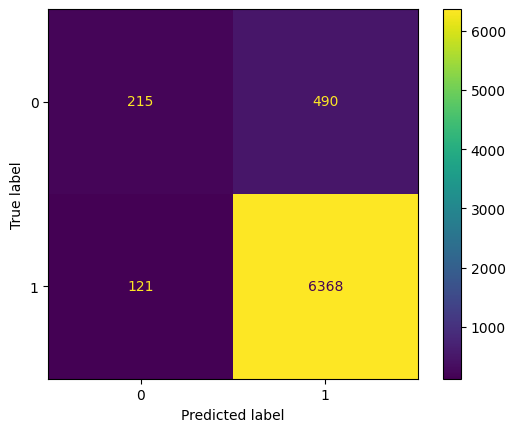

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [74]:
# use custom threshold
from sklearn.metrics import log_loss, precision_recall_curve, f1_score

def choose_best_threshold(probas, target):
    ''' iterates over thresholds to choose the one with the highest f1 score '''
    results = dict()
    precision, recall, thresholds = precision_recall_curve(target, probas)
    f1_scores = 2 * recall * precision / (recall + precision)
    best_f1_ind = np.argmax(f1_scores)
    results['best_threshold'] = thresholds[best_f1_ind]
    results['validation_precision']      = precision[best_f1_ind]
    results['validation_recall']         = recall[best_f1_ind]
    results['validation_f1_score']  = np.max(f1_scores)
    return results 

prob_predictions = grid.best_estimator_.predict_proba(X_val)[:, 1]
threshold = choose_best_threshold(prob_predictions, y_val)
print(threshold)

P_prod = grid.best_estimator_.predict_proba(X_val)[:, 1] > threshold['best_threshold']
# P_prod = grid.best_estimator_.predict_proba(X_val)[:, 1] > 0.5
print(classification_report(y_val,P_prod, digits=4))
print(f1_score(y_val, P_prod))

{'best_threshold': 0.43858317, 'validation_precision': 0.9242620590352771, 'validation_recall': 0.9892125134843581, 'validation_f1_score': 0.955634956081584}

              precision    recall  f1-score   support



           0     0.7160    0.2539    0.3749       705

           1     0.9243    0.9891    0.9556      6489



    accuracy                         0.9170      7194

   macro avg     0.8201    0.6215    0.6652      7194

weighted avg     0.9038    0.9170    0.8987      7194



0.955557209856324


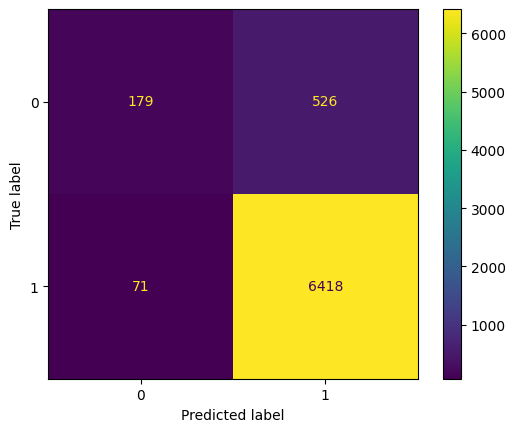

In [75]:
cm = confusion_matrix(y_val, P_prod)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [27]:
from sklearn.metrics import f1_score

# Make probability predictions on the validation data
y_prob = grid_xgb.best_estimator_.predict_proba(X_val)[:, 1]

# Compute the F1 score for different threshold values
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = [f1_score(y_val, y_prob > t) for t in thresholds]

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = np.max(f1_scores)

print(f'Best threshold: {best_threshold}')
print(f'Best F1 score: {best_f1_score}')

# Make binary predictions using the best decision threshold
y_pred = y_prob > best_threshold

print(classification_report(y_val,y_pred, digits=4))

Best threshold: 0.4
Best F1 score: 0.9553105913898405
              precision    recall  f1-score   support

           0     0.7043    0.2567    0.3763       705
           1     0.9245    0.9883    0.9553      6489

    accuracy                         0.9166      7194
   macro avg     0.8144    0.6225    0.6658      7194
weighted avg     0.9029    0.9166    0.8986      7194



In [28]:
from sklearn.metrics import f1_score

# Make probability predictions on the validation data
y_prob = grid_lgbm.best_estimator_.predict_proba(X_val)[:, 1]

# Compute the F1 score for different threshold values
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = [f1_score(y_val, y_prob > t) for t in thresholds]

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = np.max(f1_scores)

print(f'Best threshold: {best_threshold}')
print(f'Best F1 score: {best_f1_score}')

# Make binary predictions using the best decision threshold
y_pred = y_prob > best_threshold

print(classification_report(y_val,y_pred, digits=4))

Best threshold: 0.48
Best F1 score: 0.9556385362210604
              precision    recall  f1-score   support

           0     0.6894    0.2865    0.4048       705
           1     0.9271    0.9860    0.9556      6489

    accuracy                         0.9174      7194
   macro avg     0.8083    0.6363    0.6802      7194
weighted avg     0.9038    0.9174    0.9017      7194



In [29]:
from sklearn.metrics import f1_score

# Make probability predictions on the validation data
y_prob = grid_catboost.best_estimator_.predict_proba(X_val)[:, 1]

# Compute the F1 score for different threshold values
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = [f1_score(y_val, y_prob > t) for t in thresholds]

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = np.max(f1_scores)

print(f'Best threshold: {best_threshold}')
print(f'Best F1 score: {best_f1_score}')

# Make binary predictions using the best decision threshold
y_pred = y_prob > best_threshold

print(classification_report(y_val,y_pred, digits=4))

Best threshold: 0.43
Best F1 score: 0.9554499554499555
              precision    recall  f1-score   support

           0     0.7442    0.2270    0.3478       705
           1     0.9219    0.9915    0.9554      6489

    accuracy                         0.9166      7194
   macro avg     0.8330    0.6092    0.6516      7194
weighted avg     0.9045    0.9166    0.8959      7194



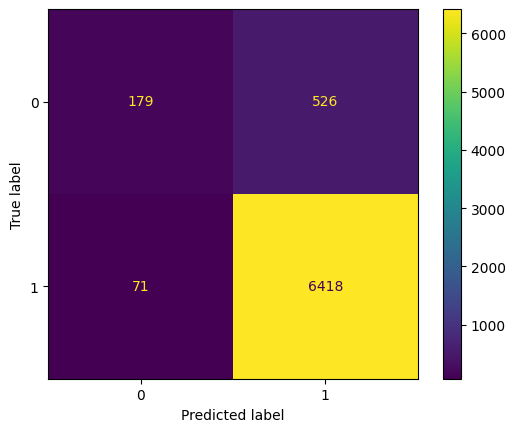

[11:34:45] WARNING: ../src/learner.cc:767: 

Parameters: { "verbose_eval" } are not used.



[CV 1/5] END colsample_bytree=1.0, eval_metric=error, gamma=0.0005, learning_rate=0.1, max_depth=12, min_child_weight=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8;, score=nan total time=   2.1s

[11:34:46] WARNING: ../src/learner.cc:767: 

Parameters: { "verbose_eval" } are not used.



[CV 4/5] END colsample_bytree=1.0, eval_metric=error, gamma=0.0005, learning_rate=0.1, max_depth=12, min_child_weight=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8;, score=nan total time=   0.7s

[11:34:47] WARNING: ../src/learner.cc:767: 

Parameters: { "verbose_eval" } are not used.



[CV 5/5] END colsample_bytree=1.0, eval_metric=error, gamma=0.0005, learning_rate=0.1, max_depth=12, min_child_weight=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8;, score=nan total time=   1.0s

[11:34:47] WARNING: ../src/learner.cc:767: 

Parameters: { "verbose_eval" } are

In [78]:
cm = confusion_matrix(y_val, P_prod)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Test set

In [79]:
X_test

,DC216,DC220,DC142a,DC024_11.0,DC024_12.0,DC024_13.0,DC024_14.0,DC024_15.0,DC024_16.0,DC024_17.0,...,DC270a_3.0,DC109_12.0,DC109_31.0,DC109_11.0,DC109_41.0,DC109_32.0,DC109_21.0,DC109_51.0,DC109_33.0,DC109_96.0
0,-1.197714,-1.420235,-0.336483,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,-1.197714,-0.472218,-0.709470,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.292958,-0.180521,-0.051258,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-1.197714,-0.180521,-0.687529,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.611798,-0.107596,0.464341,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,-0.292958,-0.909764,-0.139020,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11986,-0.292958,-0.399294,0.409490,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11987,-0.292958,-0.253445,-0.117079,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11988,-1.197714,-2.076554,-0.808201,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [80]:
df_test_ids

0        26718
1        26802
2        41302
3        38698
4        44257
         ...  
11985    36943
11986    33415
11987    41998
11988    41567
11989    45296
Name: id, Length: 11990, dtype: int64

In [81]:
P_prod_submit = grid.best_estimator_.predict_proba(X_test)[:, 1] > best_threshold
# P_prod_submit = grid.best_estimator_.predict(X_test_submit)
P_prod_submit

array([ True,  True,  True, ...,  True,  True,  True])

In [82]:
result = []
for prediction in P_prod_submit:
    result.append('Layak Minum' if prediction==1 else 'Tidak Layak Minum')
pd.DataFrame(result).value_counts()

Layak Minum          11573
Tidak Layak Minum      417
dtype: int64

In [84]:
finish_pd = pd.DataFrame({'id':df_test_ids.values, 'DC201':result})
finish_pd

,id,DC201
0,26718,Layak Minum
1,26802,Layak Minum
2,41302,Layak Minum
3,38698,Layak Minum
4,44257,Layak Minum
...,...,...
11985,36943,Layak Minum
11986,33415,Layak Minum
11987,41998,Layak Minum
11988,41567,Layak Minum


In [85]:
finish_pd['DC201'].value_counts()

Layak Minum          11573
Tidak Layak Minum      417
Name: DC201, dtype: int64

In [86]:
finish_pd.to_csv('result_xgboost_hypertuneold_standardizatino_onehot_nosmote_custom_threshold.csv', index=False)

In [ ]:
check_pd = pd.read_csv('result_xgboost_hypertuneold_standardizatino_onehot_nosmote_custom_threshold.csv')
check_pd

In [ ]:
check_pd['DC201'].value_counts()

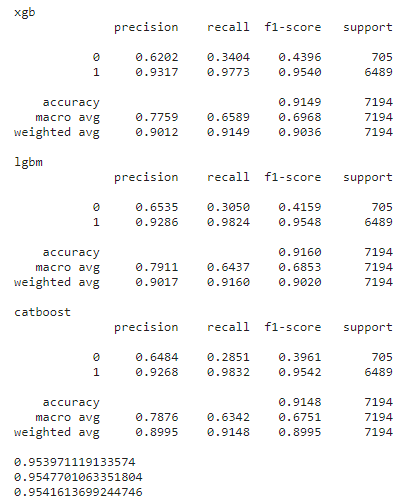